# Single-user - exchange

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### Read entire df

In [2]:
# Read csv
frames = []

for main_user_strategy in ["RANDOM", "KEEP-RENTING", "INSTANT-BUY", "DET", "RAND", "A-ADAPTED"]:
# for main_user_strategy in ["RANDOM", "KEEP-RENTING", "INSTANT-BUY", "RAND", "A-ADAPTED"]:
    for usage_size in [i/100 for i in range(5, 101, 5)]:
        df_temp = pd.read_csv(f"Model/Experiments/single-user-exchange/output/data/10000/single-user-exchange_{main_user_strategy}_{usage_size}.csv")
        df_temp["usage_size"] = usage_size
        frames.append(df_temp)

df = pd.concat(frames)

keep_columns = ["RunId", "main_user_strategy", "AgentID", "bought_at_day", "max_days", "initial_buy_price",
                "potential_FIAT_spent_rent", "total_FIAT_spent_rent", "total_FIAT_spent_buying", "optimal", "main_user_CR", "usage_size"]
df = df[keep_columns]
df["main_user_CR_log"] = np.log(df["main_user_CR"])
df = df.reset_index()
df

,index,RunId,main_user_strategy,AgentID,bought_at_day,max_days,initial_buy_price,potential_FIAT_spent_rent,total_FIAT_spent_rent,total_FIAT_spent_buying,optimal,main_user_CR,usage_size,main_user_CR_log
0,0,0,RANDOM,1,0,836,978820551.172,2890410.941,2890410.941,0.000,2890410.941,1.000,0.050,0.000
1,1,1,RANDOM,1,0,1042,980043937.943,3755915.990,3755915.990,0.000,3755915.990,1.000,0.050,0.000
2,2,2,RANDOM,1,0,1196,980145153.002,4310088.589,4310088.589,0.000,4310088.589,1.000,0.050,0.000
3,3,3,RANDOM,1,477,1961,977506697.791,7243417.290,1541907.580,979164059.387,7243417.290,135.393,0.050,4.908
4,4,4,RANDOM,1,0,644,982395092.623,2096470.459,2096470.459,0.000,2096470.459,1.000,0.050,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,9995,9995,A-ADAPTED,1,731,2044,20462546960.905,184694593071.549,20192178574.956,20464556241.272,20462546960.905,1.987,1.000,0.687
1199996,9996,9996,A-ADAPTED,1,717,2326,20465180273.563,225988007483.367,20065869644.857,20464014325.306,20465180273.563,1.980,1.000,0.683
1199997,9997,9997,A-ADAPTED,1,714,3221,20466722110.148,347506292517.293,20159859701.630,20460500758.683,20466722110.148,1.985,1.000,0.685
1199998,9998,9998,A-ADAPTED,1,721,3435,20461914278.538,353803367138.951,20305144493.230,20463041403.546,20461914278.538,1.992,1.000,0.689


### Maximum CR per algorithm

In [3]:
df_max = df.groupby(["main_user_strategy","usage_size",])["main_user_CR"].max()
li = [round(i,2) for i in df_max["DET"]]
li
# df_max[df_max["usage_size"] == 0.05]


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.01,
 2.01,
 2.01,
 2.01,
 2.01,
 2.01,
 2.01]

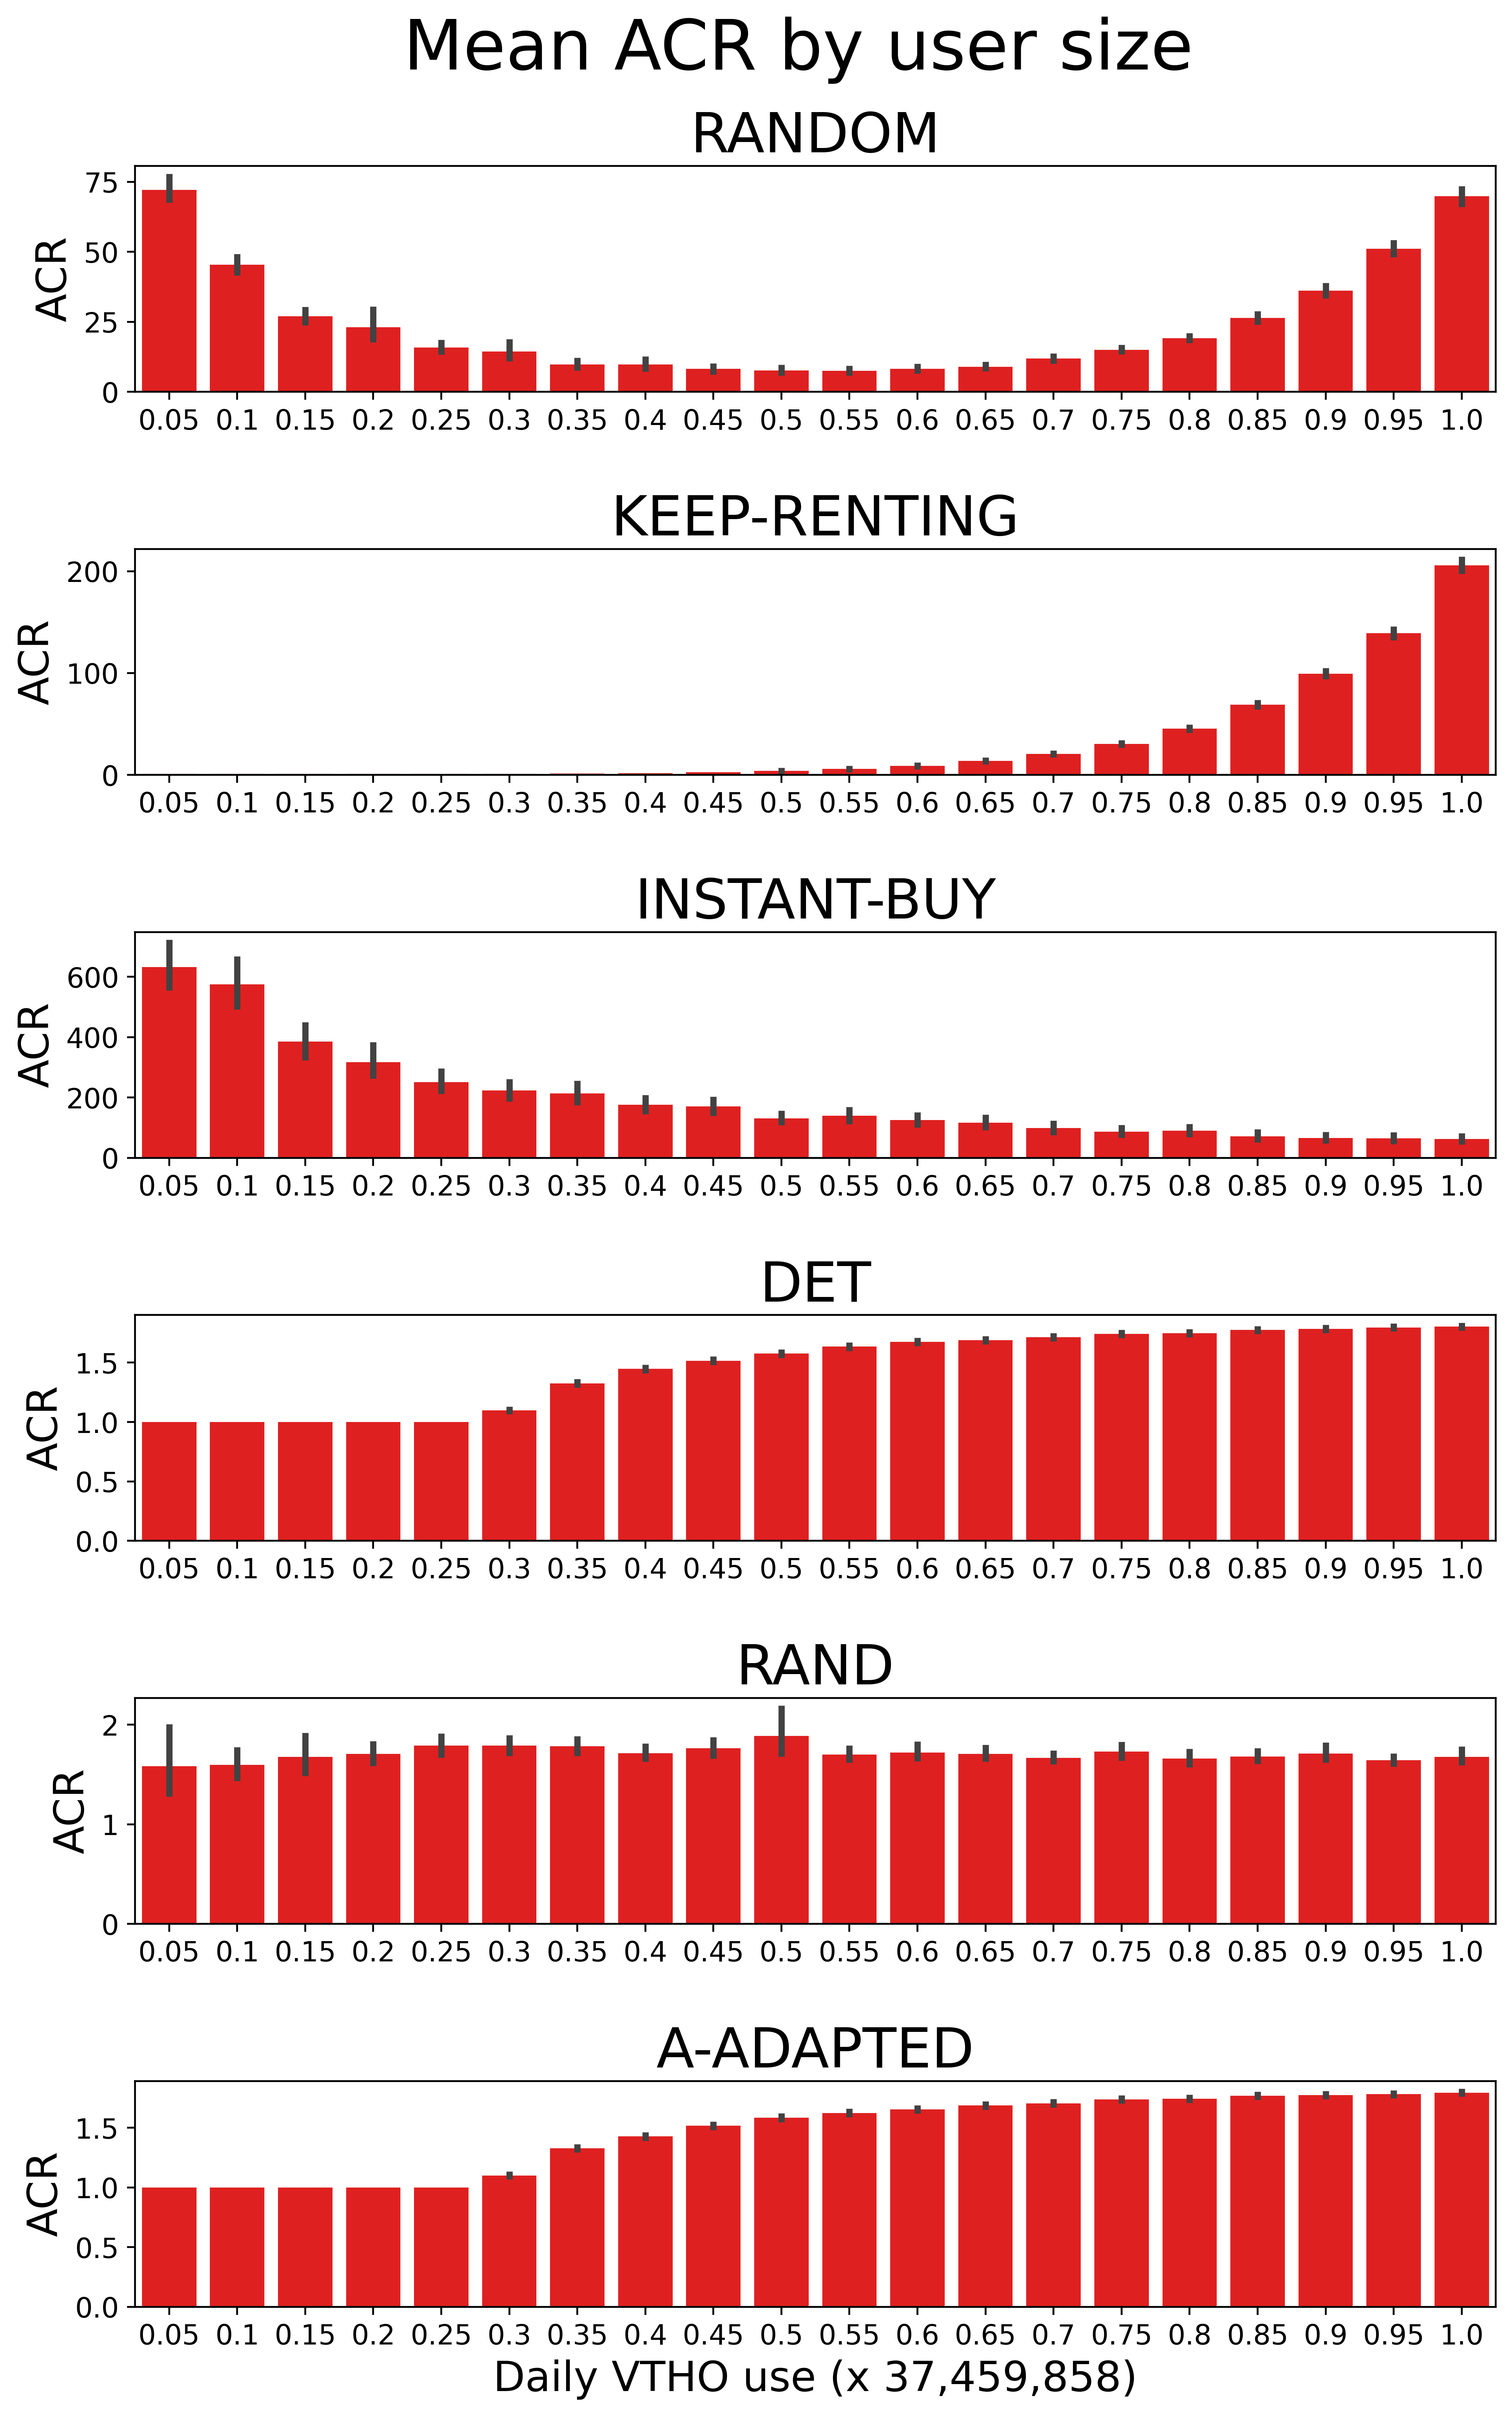

In [5]:
# Initialize plot
fig, ax = plt.subplots(6, 1, figsize=(10, 15), dpi=500)
plt.tight_layout(pad=5.0)

plt.subplots_adjust(top=0.92)
plt.suptitle("Mean ACR by user size", fontsize=30)

_titles = ["RANDOM", "KEEP-RENTING", "INSTANT-BUY", "DET", "RAND", "A-ADAPTED"]
for i in range(6):
    ax[i].set_title(_titles[i], fontsize=24)
    ax[i].set_ylabel("CR", fontsize=18)
    ax[i].tick_params(axis='x', labelsize=12)
    ax[i].tick_params(axis='y', labelsize=12)

    sns.barplot(ax=ax[i], x="usage_size", y="main_user_CR",
                data=df[df["main_user_strategy"] == _titles[i]], color="red", estimator=np.mean)
    if i == 5:
        ax[i].set_xlabel("Daily VTHO use (x 37,459,858)", fontsize=18)
    else: 
        ax[i].set_xlabel("")
    ax[i].set_ylabel("ACR")



plt.savefig("Model/Experiments/single-user-exchange/output/img/single-user-CR-by-size.pdf", format="pdf", bbox_inches="tight")
plt.savefig("Presentation/single-user-CR-by-size.png",
            format="png", bbox_inches="tight")
